We will train Random Forest classifier and Gradient Boosting classifier for MNIST.

Use the seed 0 everywhere.

1. Import MNIST data as we did in Lecture 7. We are only going to use digit 0 and digit 1. So extract only those examples and discard the rest.

Next, randomly split the data into 80% training data and 20% testing data. Then split the training data again into 75% training data and 25% validation data. Keep this split fixed throughout the experiments.

2. Use the validation set to choose the optimal hyperparameters "n_estimators" and "max_depth" for Random Forest, and report the best hyperparameters and the best validation error. The suggested hyperparameter values are

ns_estimators = [10,20,50,100,200]
max_depths = [1,2,5,10,20]

3. Train Random Forest again with all data (i.e., training + validation data). Report the training and the test error.

4. Plot the feature importance as an image, as we did in Lecture 7.

5. Repeat 2 with Gradient Boosting.

6. Repeat 3 with Gradient Boosting

7. Repeat 4 with Gradient Boosting.

##0. Libraries

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib as mpl

##1. Loading Data


In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
# Load in all mnist data
Xraw, yraw = mnist['data'], mnist['target']
# pd.Dataframe, pd.Series

# Slice out only 0 and 1 data
indices = [i for i in range(len(Xraw)) if (yraw[i] == '0' or yraw[i] == '1')]
y = yraw[indices]
X = Xraw.loc[indices]

# Split and resplit dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

##2. Hyperparameter Search

In [5]:
ns_estimators = [10,20,50,100,200]
max_depths = [1,2,5,10,20]

rfcdata = []


# Iterate through parameter list
for n in ns_estimators:
  for d in max_depths:
    # Create classifier
    rfc = RandomForestClassifier(max_depth = d, random_state = 0, n_estimators = n)
    # Fit classifier
    rfc.fit(X_train_train, y_train_train)
    # Get val MSE, append to array
    rfc_predict = rfc.predict(X_train_val)
    val_error = mean_squared_error(y_train_val, rfc_predict)
    rfcdata.append([n,d,val_error])

# Tabulate array, find minimum
print(tabulate(rfcdata, headers = ["N_estimators","Max_depths", "MSE"], tablefmt = 'grid'))
print()
print(min(rfcdata, key = lambda x: x[2]))

+----------------+--------------+-------------+
|   N_estimators |   Max_depths |         MSE |
+================+==============+=============+
|             10 |            1 | 0.0104871   |
+----------------+--------------+-------------+
|             10 |            2 | 0.00405954  |
+----------------+--------------+-------------+
|             10 |            5 | 0.00067659  |
+----------------+--------------+-------------+
|             10 |           10 | 0.00169147  |
+----------------+--------------+-------------+
|             10 |           20 | 0.00169147  |
+----------------+--------------+-------------+
|             20 |            1 | 0.0125169   |
+----------------+--------------+-------------+
|             20 |            2 | 0.00338295  |
+----------------+--------------+-------------+
|             20 |            5 | 0.00101488  |
+----------------+--------------+-------------+
|             20 |           10 | 0.00101488  |
+----------------+--------------+-------

**The optimal hyperparameters are 100 estimators, a max depth of 10, for a validation MSE of 0.000338294**

##3. Final Validation

In [6]:
rfc_opt = RandomForestClassifier(max_depth = 10, random_state = 0, n_estimators = 100)

rfc_opt.fit(X_train, y_train)
rfc_opt_train_pred = rfc_opt.predict(X_train)
rfc_opt_test_pred = rfc_opt.predict(X_test)
train_mse = mean_squared_error(y_train, rfc_opt_train_pred)
test_mse = mean_squared_error(y_test, rfc_opt_test_pred)

print("Train MSE: %f, Test MSE: %f"%(train_mse, test_mse))

Train MSE: 0.000000, Test MSE: 0.001015


**Train MSE: 0.000000, Test MSE: 0.001015**

*Note that the Train MSE is probably less than the given rounding precision*


##4. Feature Importance

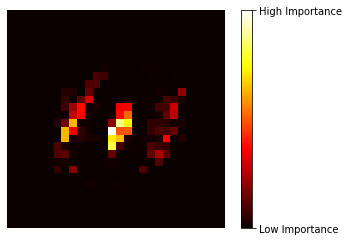

In [7]:
def plot_digit(data):
  # Reshape image to grid
  image = data.reshape(28,28)
  # Show image
  plt.imshow(image, cmap = mpl.cm.hot, interpolation = "nearest")
  plt.axis("off")

# Plot grid of feature_importances
plot_digit(rfc_opt.feature_importances_)

# Set colorbar
cbar = plt.colorbar(ticks = [rfc_opt.feature_importances_.min(), rfc_opt.feature_importances_.max()])
cbar.ax.set_yticklabels(["Low Importance", "High Importance"])

plt.show()

##5. Boosted Hyperparameter Search

In [8]:
ns_estimators = [10,20,50,100,200]
max_depths = [1,2,5,10,20]

gbcdata = []

# Iterate through parameter list
for n in ns_estimators:
  for d in max_depths:
    # Create classifier
    gbc = GradientBoostingClassifier(max_depth = d, random_state = 0, n_estimators = n)
    # Fit classifier
    gbc.fit(X_train_train, y_train_train)
    # Get validation MSE, append to array
    gbc_predict = gbc.predict(X_train_val)
    val_error = mean_squared_error(y_train_val, gbc_predict)
    gbcdata.append([n,d,val_error])

# Tabulate MSE data, find minimum
print(tabulate(gbcdata, headers = ["N_estimators","Max_depths", "MSE"], tablefmt = 'grid'))
print()
print(min(gbcdata, key = lambda x: x[2]))

+----------------+--------------+------------+
|   N_estimators |   Max_depths |        MSE |
+================+==============+============+
|             10 |            1 | 0.011502   |
+----------------+--------------+------------+
|             10 |            2 | 0.00405954 |
+----------------+--------------+------------+
|             10 |            5 | 0.00439783 |
+----------------+--------------+------------+
|             10 |           10 | 0.00507442 |
+----------------+--------------+------------+
|             10 |           20 | 0.00541272 |
+----------------+--------------+------------+
|             20 |            1 | 0.0108254  |
+----------------+--------------+------------+
|             20 |            2 | 0.00304465 |
+----------------+--------------+------------+
|             20 |            5 | 0.00338295 |
+----------------+--------------+------------+
|             20 |           10 | 0.00473613 |
+----------------+--------------+------------+
|            

**The optimal hyperparameters are 100 estimators, a max depth of 5, for a validation MSE of 0.0010148849797023004**

##6. Boosted Final Validation

In [ ]:
gbc_opt = GradientBoostingClassifier(max_depth = 5, random_state = 0, n_estimators = 100)

gbc_opt.fit(X_train, y_train)
gbc_opt_train_pred = gbc_opt.predict(X_train)
gbc_opt_test_pred = gbc_opt.predict(X_test)
train_mse = mean_squared_error(y_train, gbc_opt_train_pred)
test_mse = mean_squared_error(y_test, gbc_opt_test_pred)

print("Train MSE: %f, Test MSE: %f"%(train_mse, test_mse))

**Train MSE: 0.000846, Test MSE: 0.002030**

##7. Boosted Feature Importance

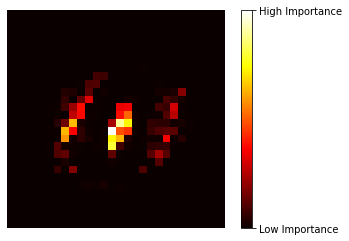

In [11]:
def plot_digit(data):
  # Reshape image to grid
  image = data.reshape(28,28)
  # Show image
  plt.imshow(image, cmap = mpl.cm.hot, interpolation = "nearest")
  plt.axis("off")

# Plot grid of feature_importances
plot_digit(gbc_opt.feature_importances_)

# Set colorbar
cbar = plt.colorbar(ticks = [gbc_opt.feature_importances_.min(), gbc_opt.feature_importances_.max()])
cbar.ax.set_yticklabels(["Low Importance", "High Importance"])

plt.show()